###  베깅 bagging 기반 분류기

<img src='img/bagging.png'>

* 연주하기 어려운 바이올린 연주곡을 두세명의 초급 바이올린 연주가가 나눠 연주함으로 써 한명의 중급 연주자가 연주하는 것보다 더 나을 수 있음
* boostrap + aggregation
    + 한 가지 분류 모델을 여러개 만드어서 서로 다은 학습 데이터로 학습시킨 후(boostrap)
    + 동일한 테스트 데이터에 대한 서로 다른 예측값들을 투표로 통해(aggregating) 가장 높은 예측값으로 최종 결론을 내리는 기법
* sklearn에서 BaggingClassifier를 제공

### boostrap
* 배깅은 하나의 알고리즘을 사용하지만 학습 데이터셋을 랜덤하게 추출하여 모델(분류기)을 각각 다르게 학습시키는 방법
* 학습데이터를 추출할 때 <span style=color:green>**중복**</span>을 허용하는것
* 데이터에 편향성이 생겨 모델이 과적합되는 것을 막을 수 있음

### 랜덤 포레스트
* 앙상블 알고리즘 중 배깅을 적용해서 만든 머신러닝 알고리즘

<img src='img/randomforest.png'>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
# 테스트용 데이터 생성 및 시각화
X, y = make_blobs(n_samples=350, centers=4,random_state=2111111715, cluster_std=1.0)

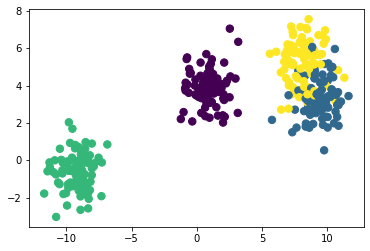

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y,test_size=0.3, random_state=2111111715)

In [8]:
# Baggingclassifier(분류기,옵션)
# n_estimators : 베깅시 사용할 분류기 수 지정
# max_samples : 베깅시 사용할 표본의 갯수
# boostrap : 표본 추출시 중복 허용여부 지정
# n_jobs : 작업시 사용할 cpu 코어수 (-1은 최대로 사용)
bgcf = BaggingClassifier(LogisticRegression(max_iter=1000),n_estimators=300, max_samples=175,bootstrap=True, n_jobs=-1)
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print( bgcf.score(Xtrain, ytrain),accuracy_score(ytest, pred))

0.9346938775510204 0.8857142857142857


In [9]:
import mldlpy3

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


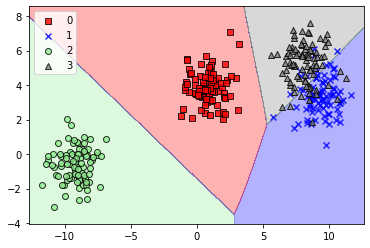

In [10]:
mldlpy3.plot_decision_regions(X,y, bgcf)

In [11]:
# 분류기 1개 수행시 결과
bgcf = LogisticRegression(max_iter=1000,n_jobs=-1)
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9346938775510204 0.8857142857142857


In [12]:
# kneighbor 분류기 적용

bgcf = BaggingClassifier(KNeighborsClassifier(),n_estimators=300, max_samples=175,bootstrap=True,n_jobs=-1)
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print( bgcf.score(Xtrain, ytrain),accuracy_score(ytest, pred))

0.9510204081632653 0.9047619047619048


In [13]:
# 분류기 1개 수행시 결과
kcf = KNeighborsClassifier()
kcf.fit(Xtrain, ytrain)
pred = kcf.predict(Xtest)
print( kcf.score(Xtrain, ytrain),accuracy_score(ytest, pred))

0.9469387755102041 0.9142857142857143
